# d-resolved PDOS

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

def plot_pdos_case(qval, Uval):
    title = "unrelaxed"
    data = np.loadtxt(f'{Uval}/6.pdos_files/Cu_vac_in_ZnS.{qval}.unrlxd.U{Uval}.pdos_atm#57(Cu)_wfc#4(d)')

    energy =  data[:,0]
    fermi = 5.5452
    my_dpi=99
    fig, axs = plt.subplots(2, 3, figsize=(1200/my_dpi, 900/my_dpi), dpi=my_dpi)

    # Top row with three subplots
    axs[0, 0].plot(energy - fermi, data[:,5], linewidth=1, color='b', label=r'$d_{xy}$')
    axs[0, 0].plot(energy - fermi, -1*data[:,6], linewidth=1, color='b')
    axs[0, 0].set_xlabel('Energy (eV)', fontsize=15)
    axs[0, 0].set_ylabel('DOS', fontsize=15)
    axs[0, 0].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[0, 0].legend(frameon=False, fontsize=15)
    axs[0, 0].set_xticks(np.arange(-12,6,1))
    axs[0, 0].set_xlim(-5, 2)
    axs[0, 0].set_ylim(-3, 3)

    axs[0, 1].plot(energy - fermi, data[:,7], linewidth=1, color='r', label=r'$d_{xz}$')
    axs[0, 1].plot(energy - fermi, -1*data[:,8], linewidth=1, color='r')
    axs[0, 1].set_xlabel('Energy (eV)', fontsize=15)
    axs[0, 1].set_ylabel('DOS', fontsize=15)
    axs[0, 1].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[0, 1].legend(frameon=False, fontsize=15)
    axs[0, 1].set_xticks(np.arange(-12,6,1))
    axs[0, 1].set_xlim(-5, 2)
    axs[0, 1].set_ylim(-3, 3)

    axs[0, 2].plot(energy - fermi, data[:,11], linewidth=1, color='g', label=r'$d_{yz}$')
    axs[0, 2].plot(energy - fermi, -1*data[:,12], linewidth=1, color='g')
    axs[0, 2].set_xlabel('Energy (eV)', fontsize=15)
    axs[0, 2].set_ylabel('DOS', fontsize=15)
    axs[0, 2].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[0, 2].legend(frameon=False, fontsize=15)
    axs[0, 2].set_xticks(np.arange(-12,6,1))
    axs[0, 2].set_xlim(-5, 2)
    axs[0, 2].set_ylim(-3, 3)

    # Bottom row with two subplots
    axs[1, 0].plot(energy - fermi, data[:,3], linewidth=1, color='k', label=r'$d_{z^{2}}$')
    axs[1, 0].plot(energy - fermi, -1*data[:,4], linewidth=1, color='k')
    axs[1, 0].set_xlabel('Energy (eV)', fontsize=15)
    axs[1, 0].set_ylabel('DOS', fontsize=15)
    axs[1, 0].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[1, 0].legend(frameon=False, fontsize=15)
    axs[1, 0].set_xticks(np.arange(-12,6,1))
    axs[1, 0].set_xlim(-5, 2)
    axs[1, 0].set_ylim(-3, 3)

    axs[1, 1].plot(energy - fermi, data[:,9], linewidth=1, color='c', label=r'$d_{x^2-y^2}$')
    axs[1, 1].plot(energy - fermi, -1*data[:,10], linewidth=1, color='c')
    axs[1, 1].set_xlabel('Energy (eV)', fontsize=15)
    axs[1, 1].set_ylabel('DOS', fontsize=15)
    axs[1, 1].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[1, 1].legend(frameon=False, fontsize=15)
    axs[1, 1].set_xticks(np.arange(-12,6,1))
    axs[1, 1].set_xlim(-5, 2)
    axs[1, 1].set_ylim(-3, 3)

    # Hide the empty subplot
    axs[1, 2].axis('off')

    # adjust subplot layout
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    # set the overall title
    plt.suptitle(r"Projected DOS for $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$ in ZnS, " + f"(U={Uval} eV, {qval}, {title})", fontsize=15)
    plt.tight_layout()
    # show the plot
    plt.show()

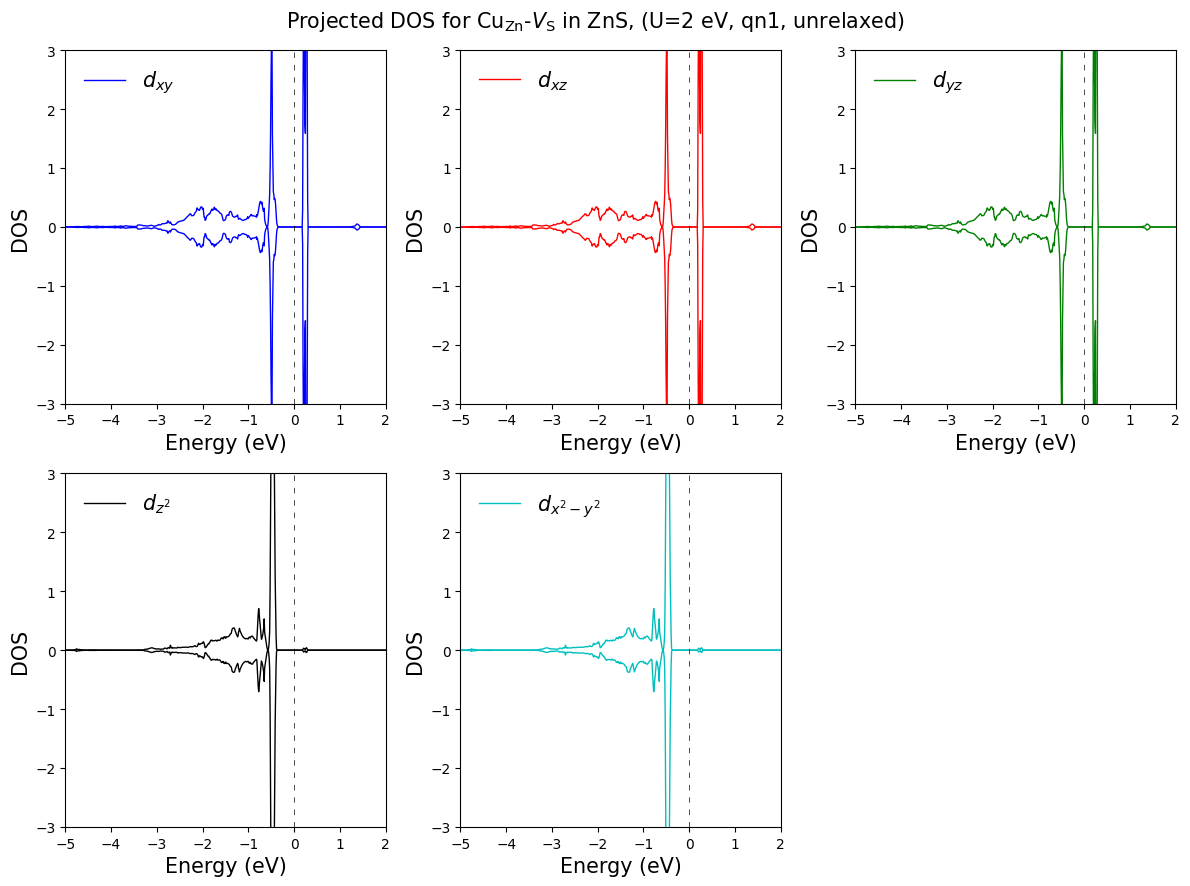

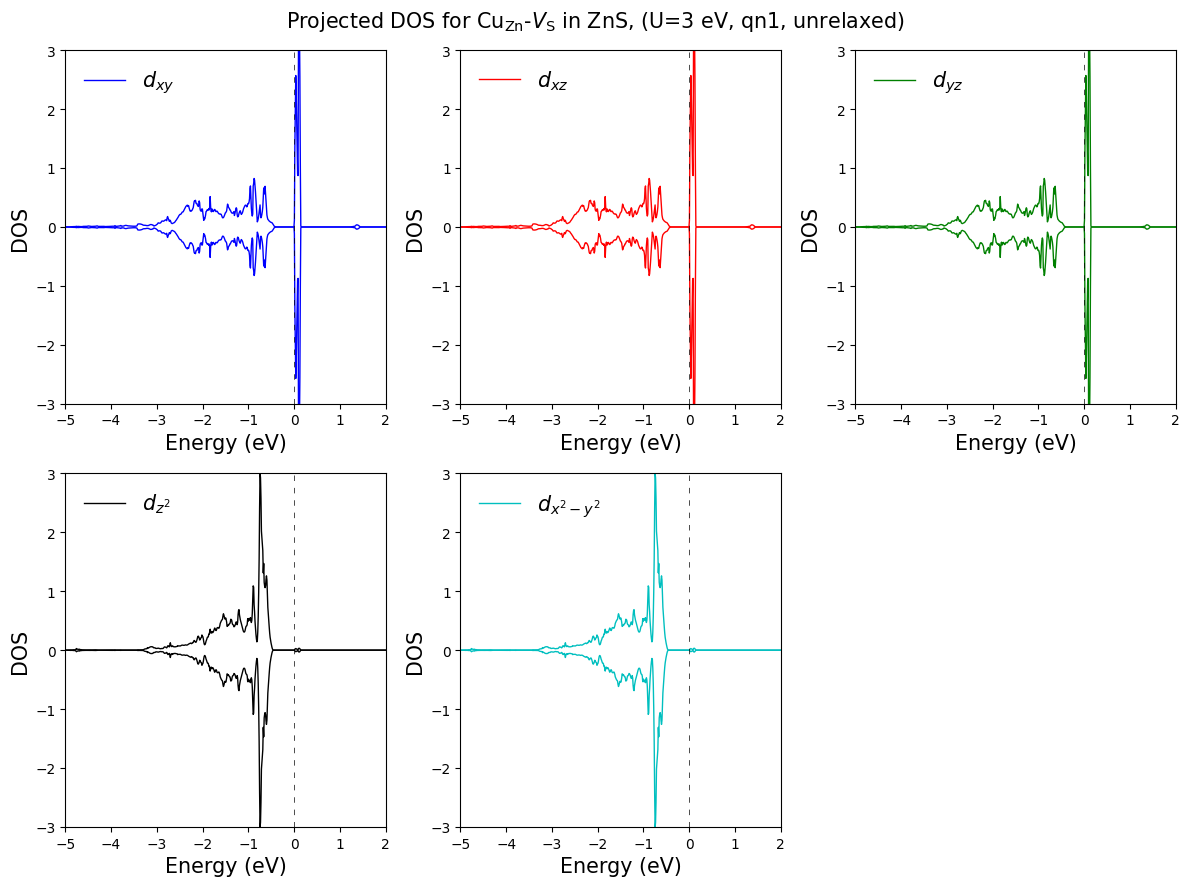

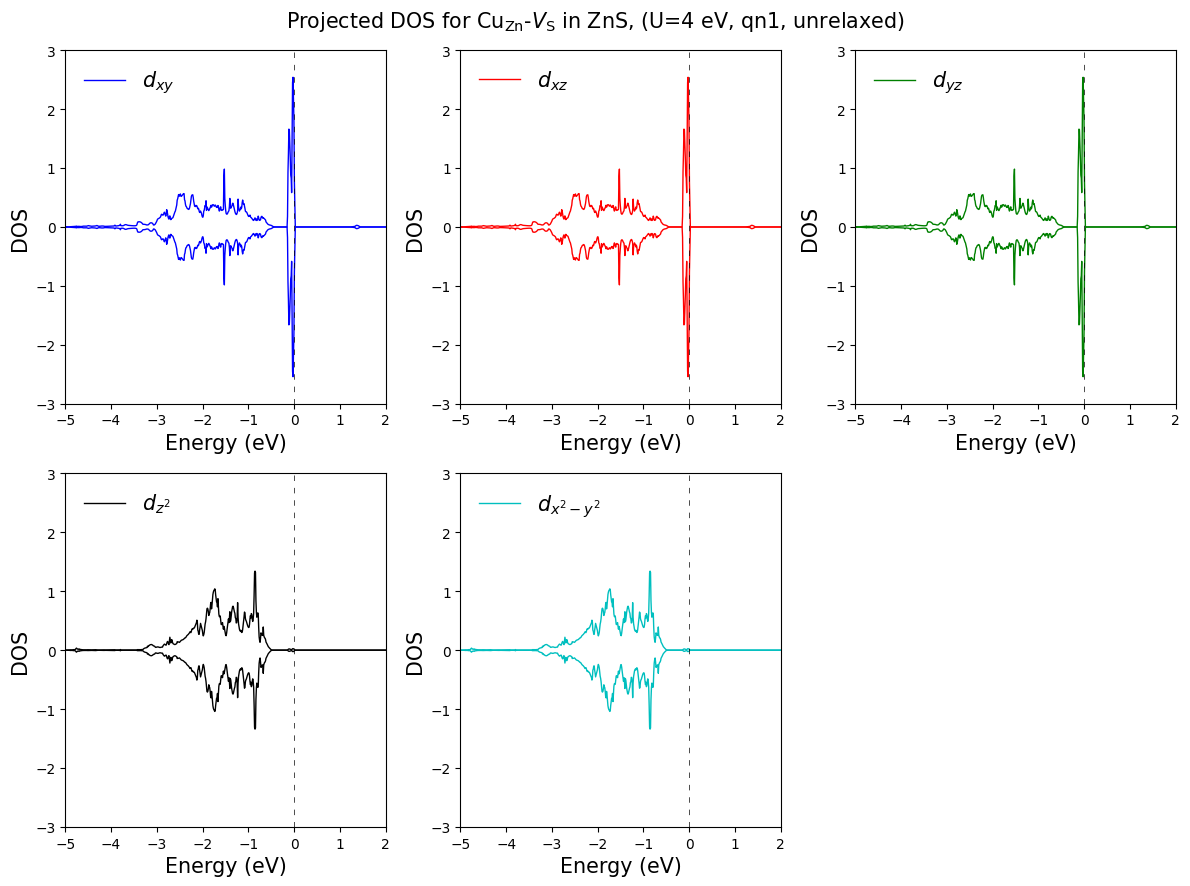

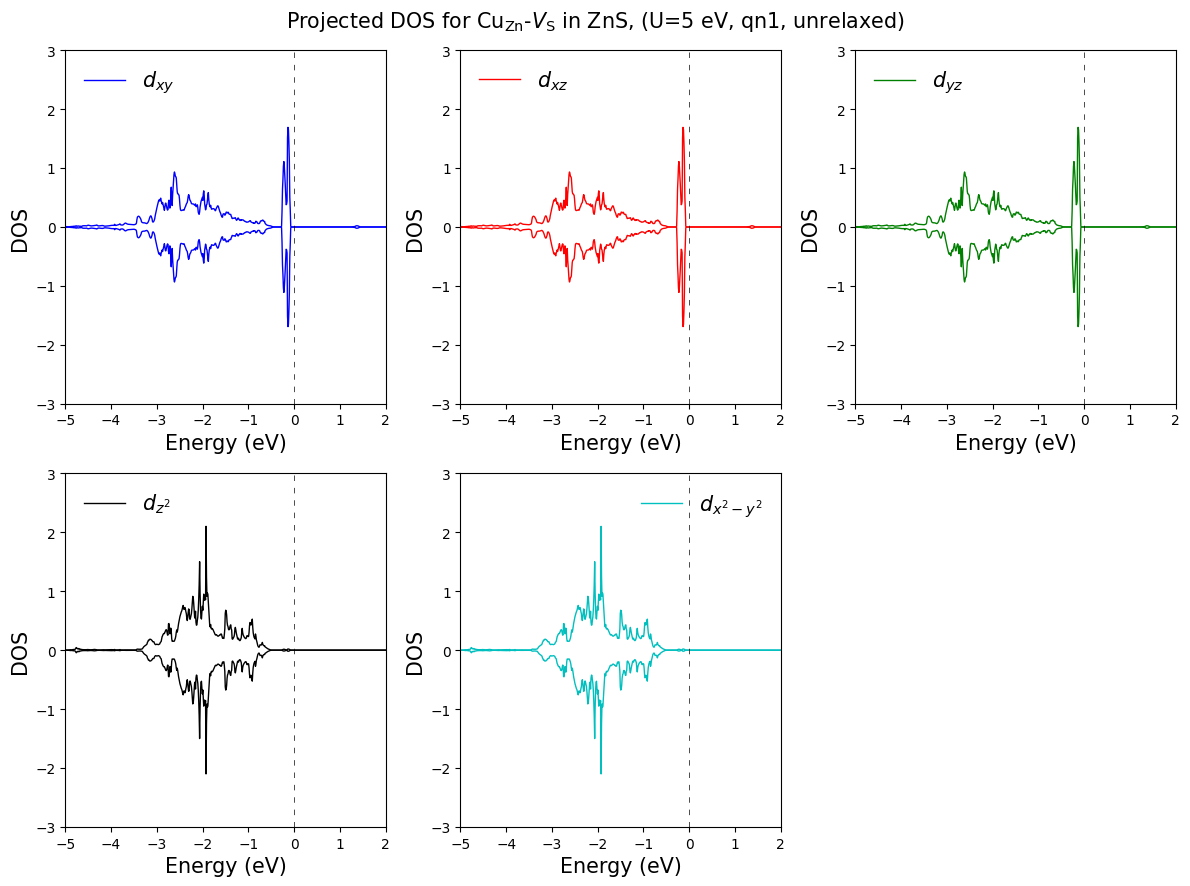

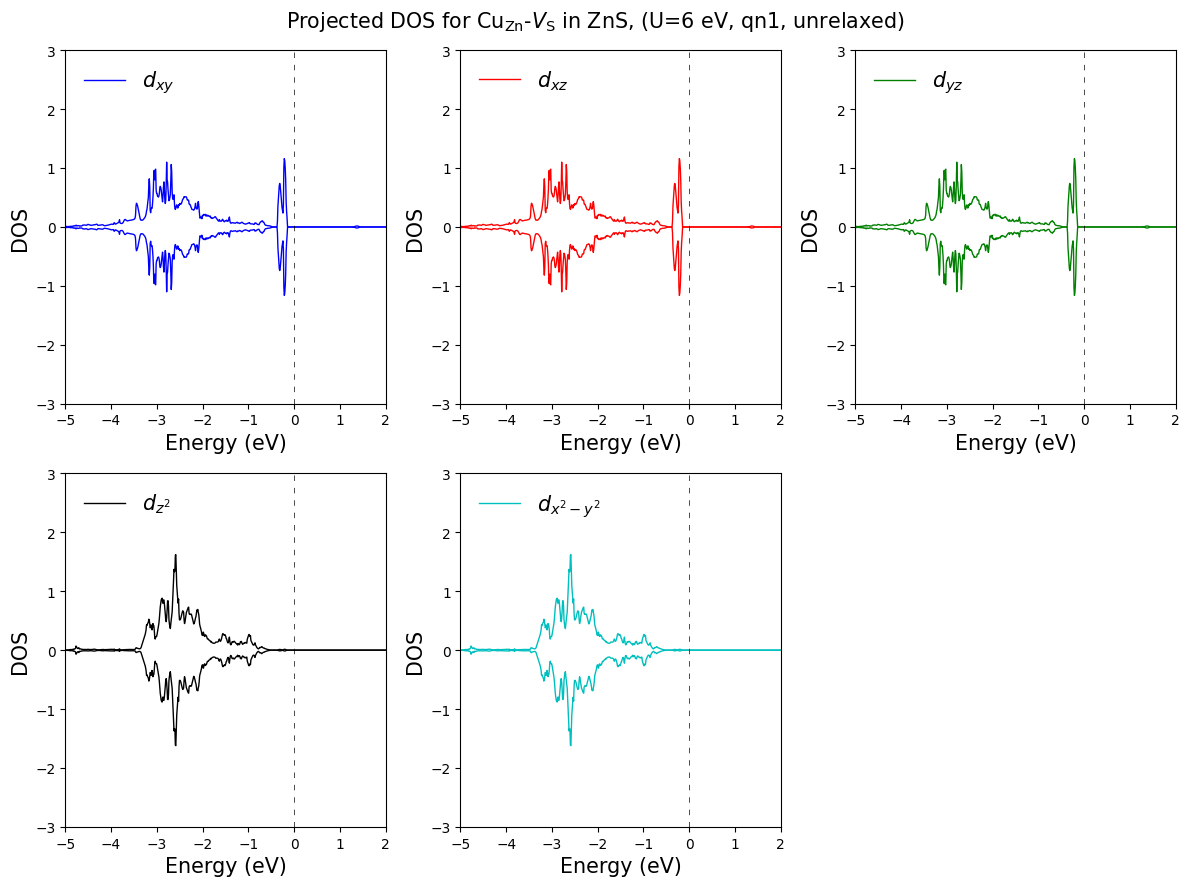

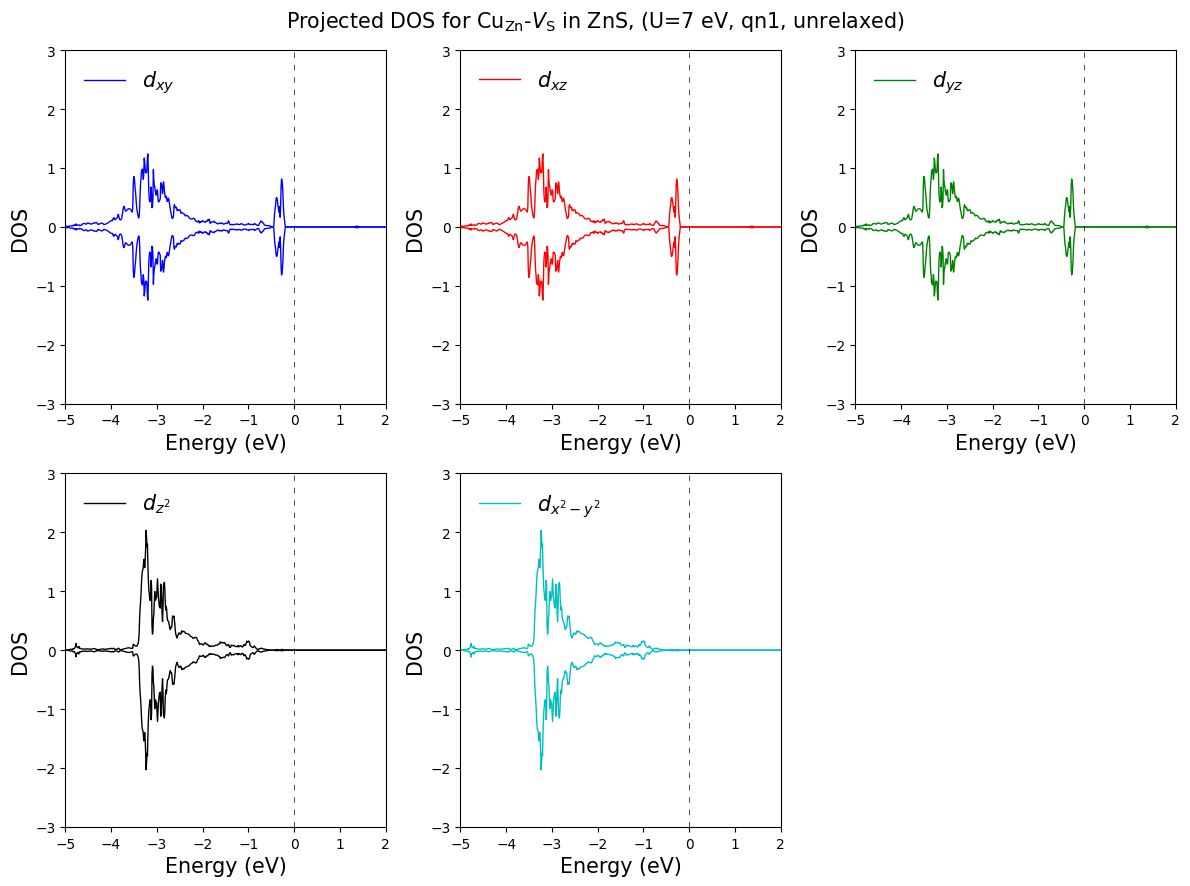

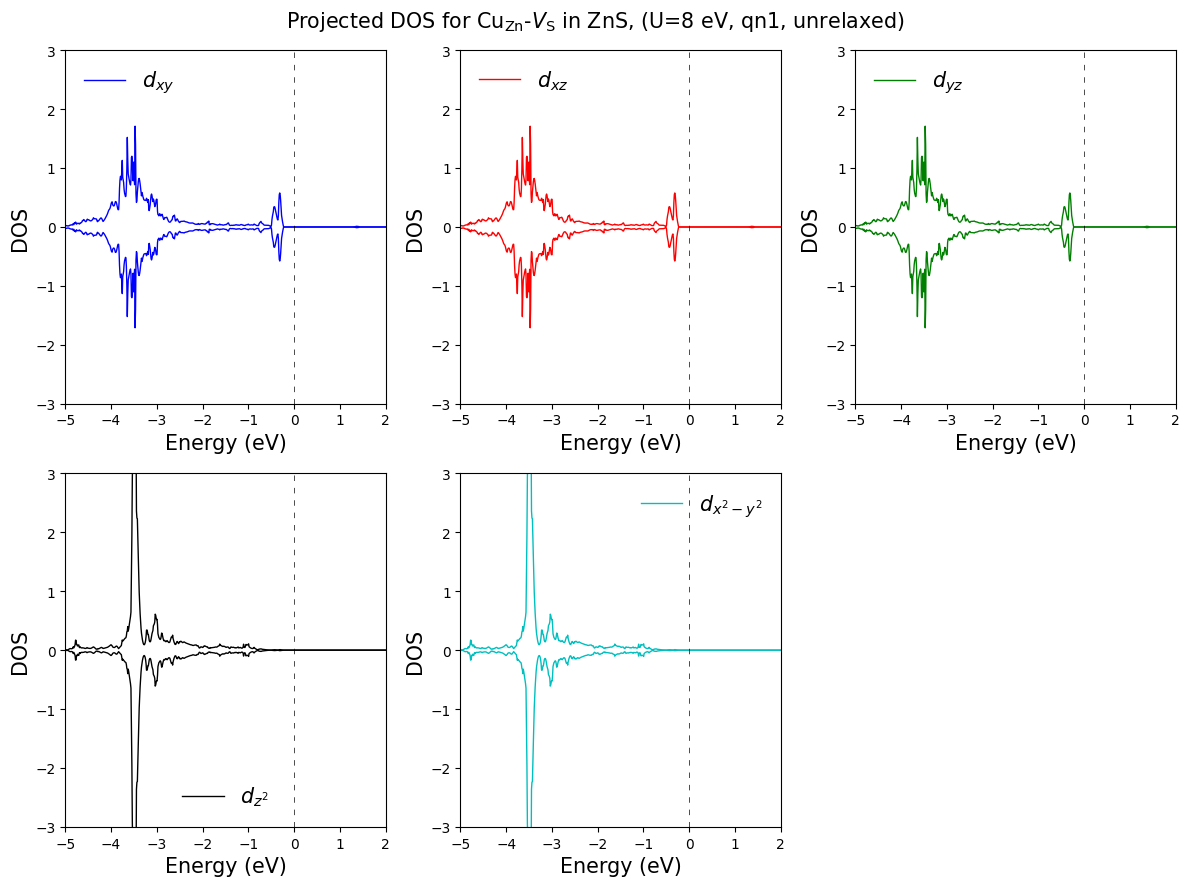

In [2]:
for i in range(2,9):
    plot_pdos_case("qn1", str(i))

# t2-eg resolved pdos

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
def data_loader_case(case, qval, Uval):
    data = np.loadtxt(f'{Uval}/6.pdos_files/Cu_vac_in_ZnS.{qval}.unrlxd.U{Uval}.pdos_atm#57(Cu)_wfc#4(d)')
    energy =  data[:,0]
    if case == 't2g':
        arr_up = data[:,5] +  data[:,7] +  data[:,11]
        arr_dw = data[:,6] +  data[:,8] + data[:,12] 
    elif case == 'eg':
        arr_up = data[:,3] +  data[:,9]
        arr_dw = data[:,4] +  data[:,10] 
    
    return energy, arr_up, -1*arr_dw

def plot_pdos_case(qval, Uval):
    title = "unrelaxed"
    energy, pdos_Cu_3d_t2g_up, pdos_Cu_3d_t2g_dw = data_loader_case('t2g', qval, Uval)
    _, pdos_Cu_3d_eg_up, pdos_Cu_3d_eg_dw = data_loader_case('eg', qval, Uval)

    fermi = 5.5452
    my_dpi=99
    fig, axs = plt.subplots(2, 1, figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)

    # Top row with three subplots
    axs[0].plot(energy - fermi, pdos_Cu_3d_t2g_up, linewidth=1, color='r', label=r'$t_{2g}$')
    axs[0].plot(energy - fermi, pdos_Cu_3d_t2g_dw, linewidth=1, color='r')
    axs[0].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[0].legend(frameon=False, fontsize=15)
    axs[0].set_xticks(np.arange(-12,6,1))
    axs[0].set_xlim(-5, 2)
    axs[0].set_ylim(-15, 15)

    axs[1].plot(energy - fermi, pdos_Cu_3d_eg_up, linewidth=1, color='b', label=r'$e_{g}$')
    axs[1].plot(energy - fermi, pdos_Cu_3d_eg_dw, linewidth=1, color='b')
    axs[1].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[1].legend(frameon=False, fontsize=15)
    axs[1].set_xticks(np.arange(-12,6,1))
    axs[1].set_xlim(-5, 2)
    axs[1].set_ylim(-15, 15)


    # adjust subplot layout
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    # set the overall title
    plt.suptitle(r"Projected DOS for $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$ in ZnS, " + f"(U={Uval} eV, {qval}, {title})", fontsize=15)
    plt.tight_layout()
    plt.ylabel('DOS', fontsize=15)
    plt.xlabel('Energy (eV)', fontsize=15)
    # show the plot
    plt.show()

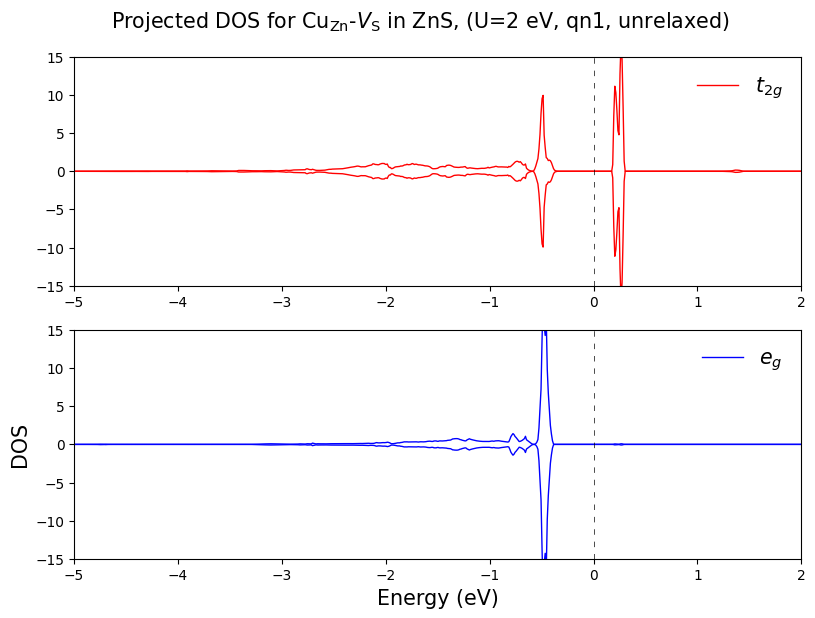

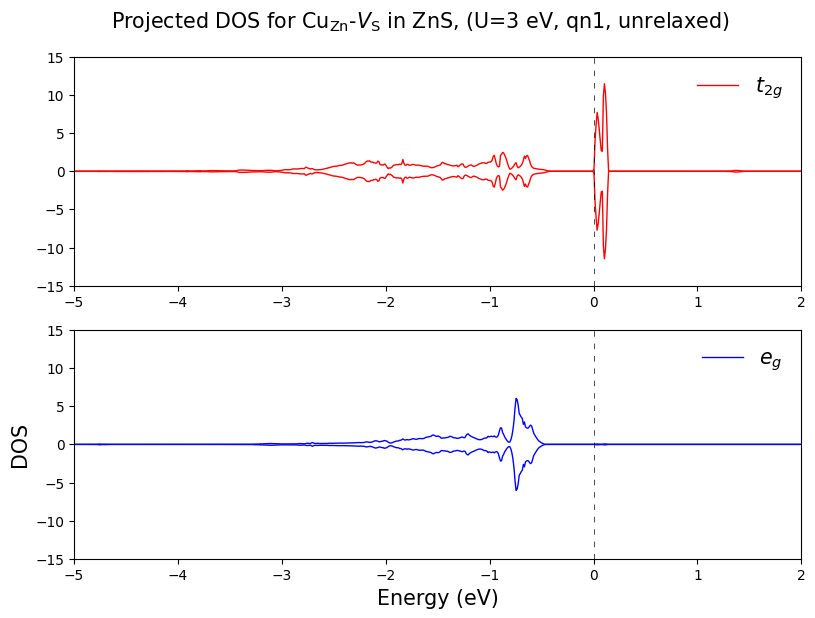

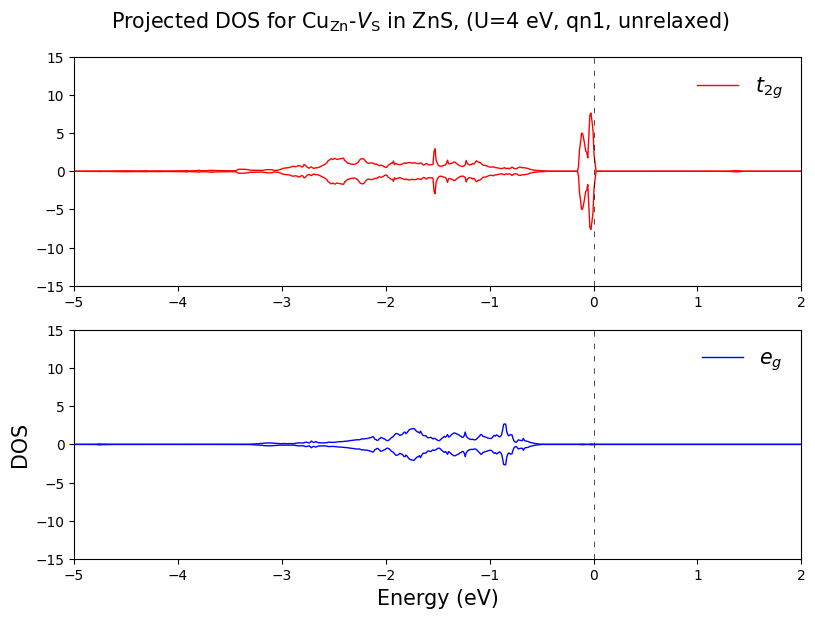

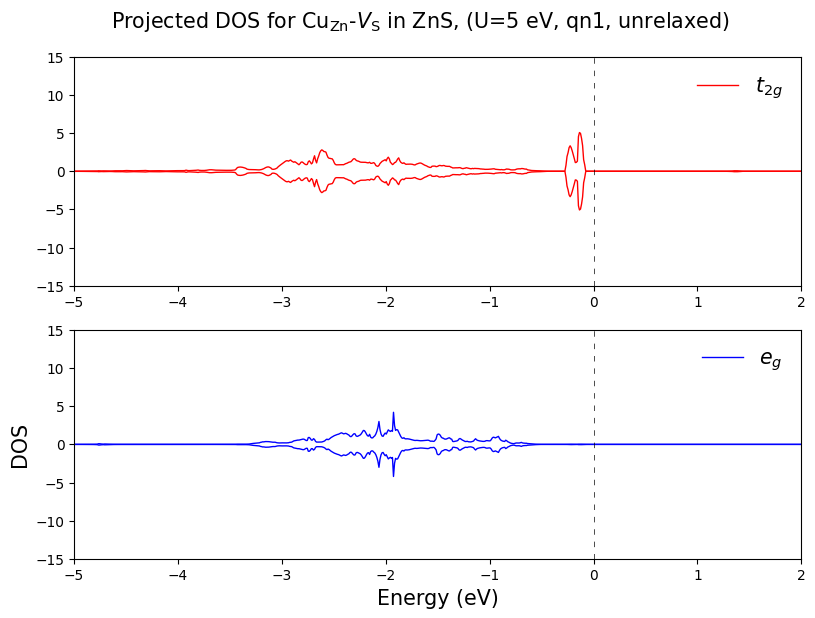

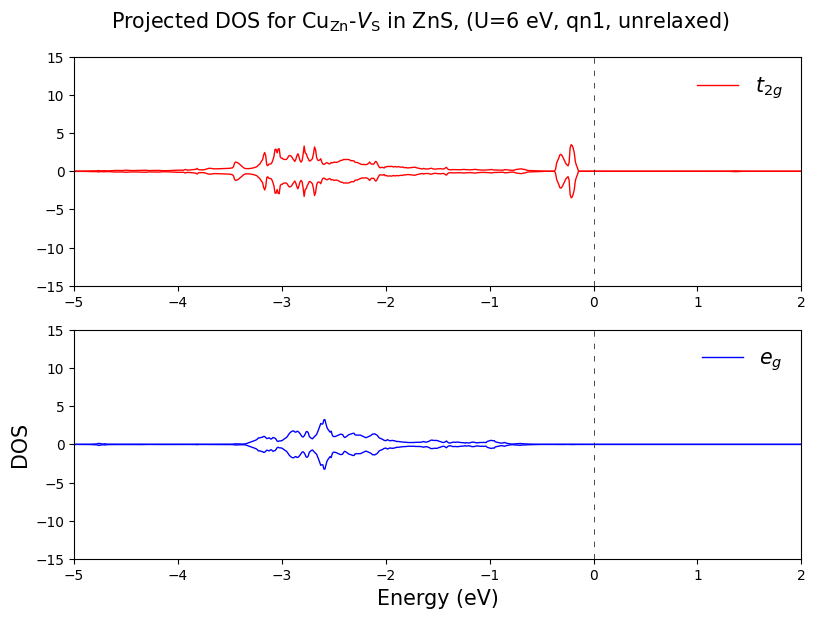

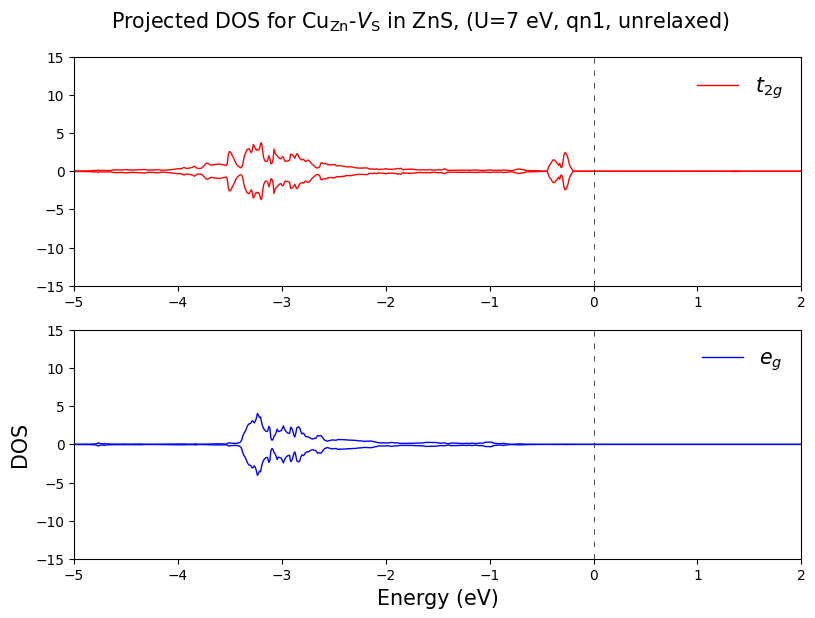

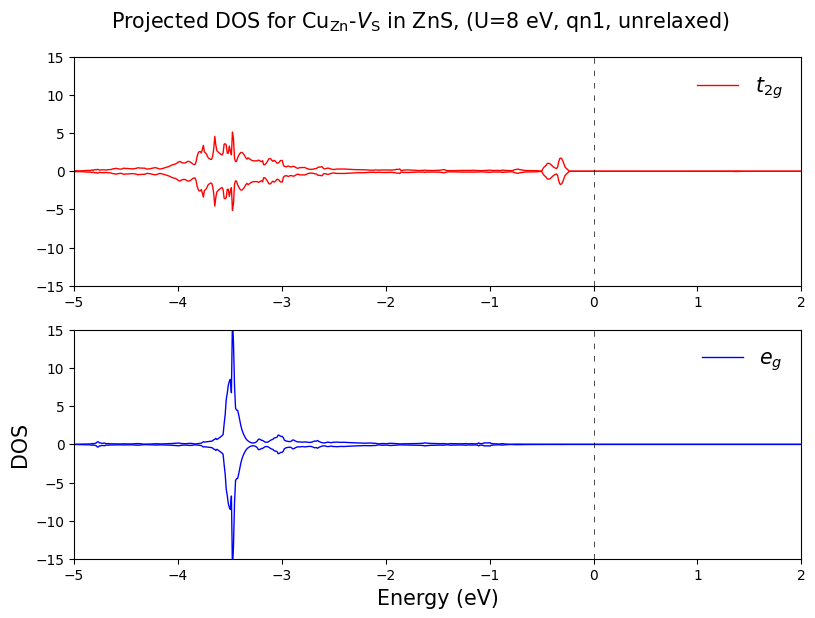

In [4]:
for i in range(2,9):
    plot_pdos_case("qn1", str(i))

# Code

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
def data_loader(fname):

    data = np.loadtxt(fname, skiprows=1, dtype='float')
    ws = 4
    energy =  data[int(ws/2)-1:int(-1*ws/2),0]

    pdos_up = []
    pdos_dw = []
    arr_up = data[:,1] 
    arr_dw = data[:,2] 
    
    i = 0
    while i < len(arr_up)-ws + 1:
        window = arr_up[i : i + ws]
        avg = sum(window)/ws
        pdos_up.append(avg)
        i += 1
    i = 0
    while i < len(arr_dw)-ws + 1:
        window = arr_dw[i : i + ws]
        avg = sum(window)/ws
        pdos_dw.append(-1*avg)
        i += 1
    #return data[:,0], data[:,1], -1*data[:,2]
    return energy, pdos_up, pdos_dw

def plot_pdos(qval, Uval):
    title="unrelaxed"
    energy, pdos_Cu_3d_up, pdos_Cu_3d_dw = data_loader(f'{Uval}/6.pdos_files/Cu_vac_in_ZnS.{qval}.unrlxd.U{Uval}.pdos_atm#57(Cu)_wfc#4(d)')
    _, pdos_S_up, pdos_S_dw = data_loader(f'{Uval}/6.pdos_files/S.pdos')
    _, pdos_Zn_up, pdos_Zn_dw = data_loader(f'{Uval}/6.pdos_files/Zn.pdos')

    fermi = 5.5452
    my_dpi=99
    fig,ax = plt.subplots(figsize=(777/my_dpi,657/my_dpi), dpi=my_dpi)

    # plot data
    ax.plot(energy - fermi, pdos_S_up, linewidth=1, color='b', label='S')
    ax.plot(energy - fermi, pdos_S_dw, linewidth=1, color='b')

    ax.plot(energy - fermi, pdos_Zn_up, linewidth=1, color='g', label='Zn')
    ax.plot(energy - fermi, pdos_Zn_dw, linewidth=1, color='g')

    ax.plot(energy - fermi, pdos_Cu_3d_up, linewidth=1, color='r', label='Cu-3d')
    ax.plot(energy - fermi, pdos_Cu_3d_dw, linewidth=1, color='r')

    ax.set_xlabel('Energy (eV)')
    ax.set_ylabel('DOS')
    ax.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    ax.legend(frameon=False)
    ax.set_xticks(np.arange(-12,6,1))

    # adjust subplot layout
    plt.subplots_adjust(hspace=0.4)
    plt.xlim(-5, 4)
    plt.ylim(-40, 40)
    # set the overall title
    plt.suptitle(r"Projected DOS for $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$ in ZnS, " + f"(U={Uval} eV, {qval}, {title})")
    plt.tight_layout()
    # show the plot
    plt.show()

## PDOS unrelaxed

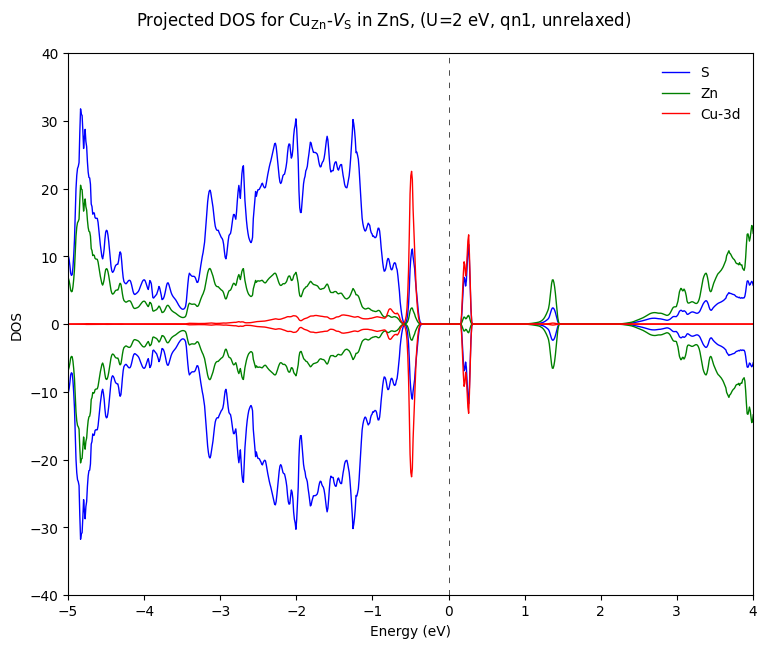

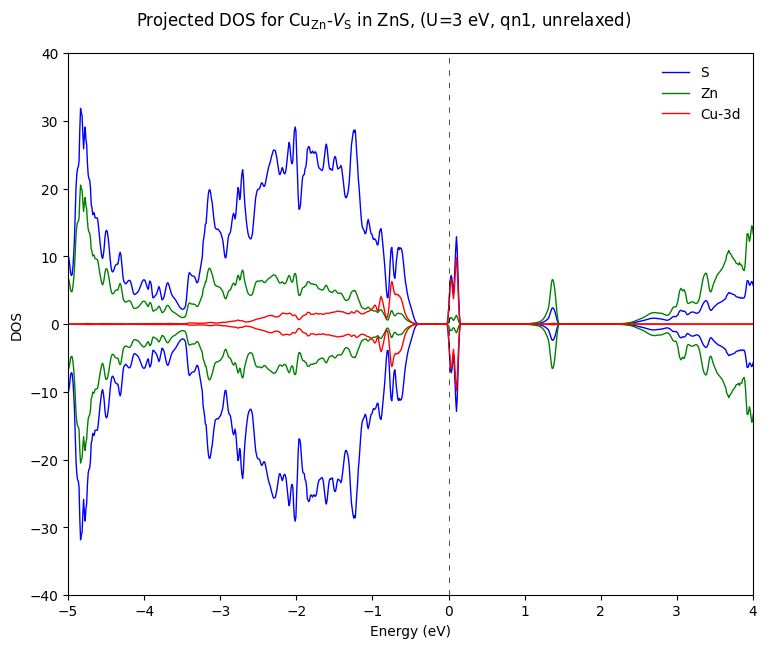

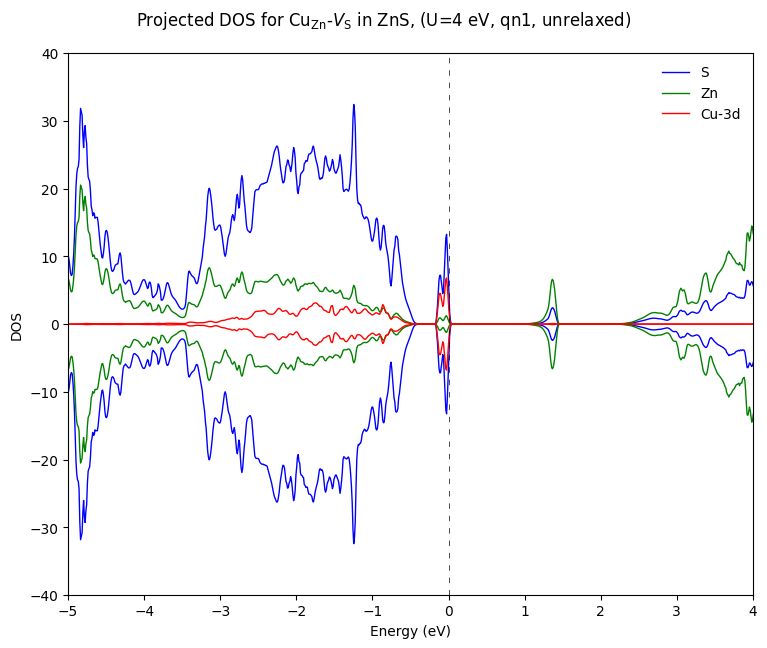

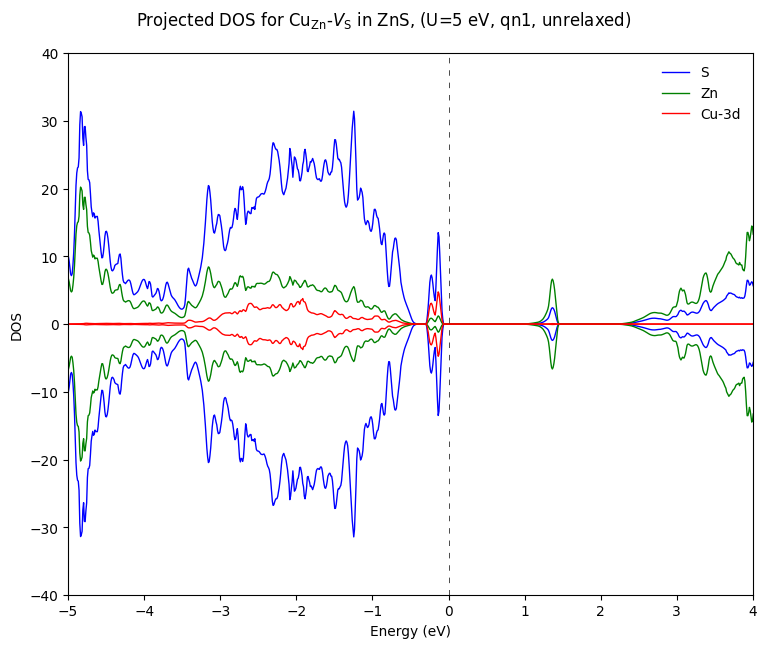

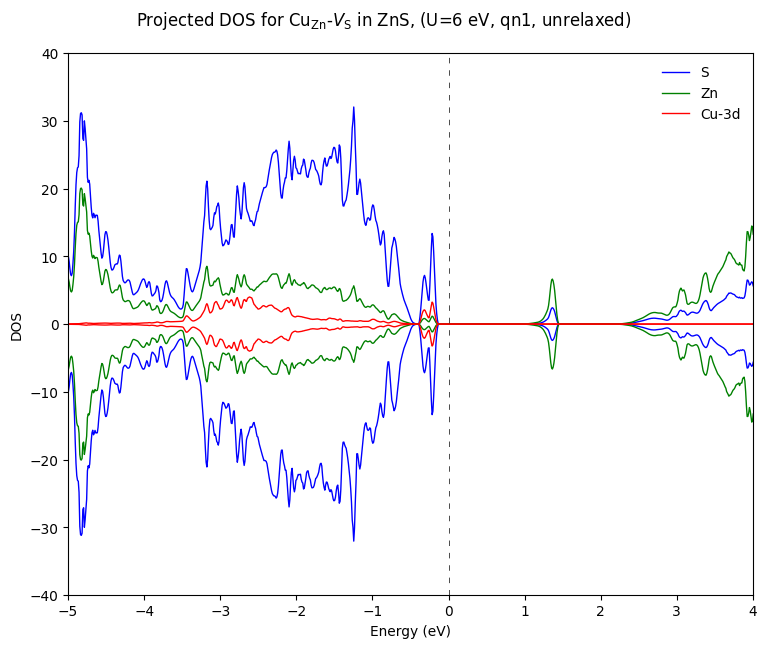

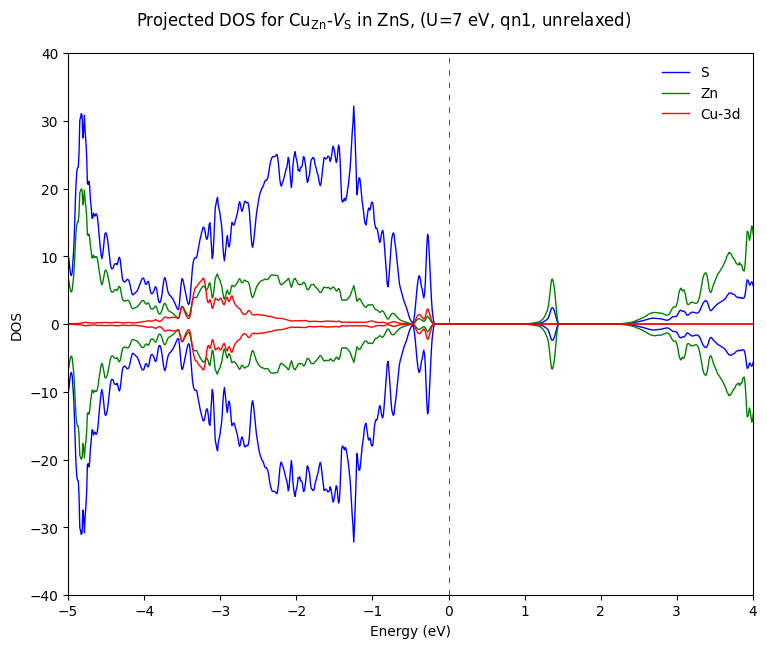

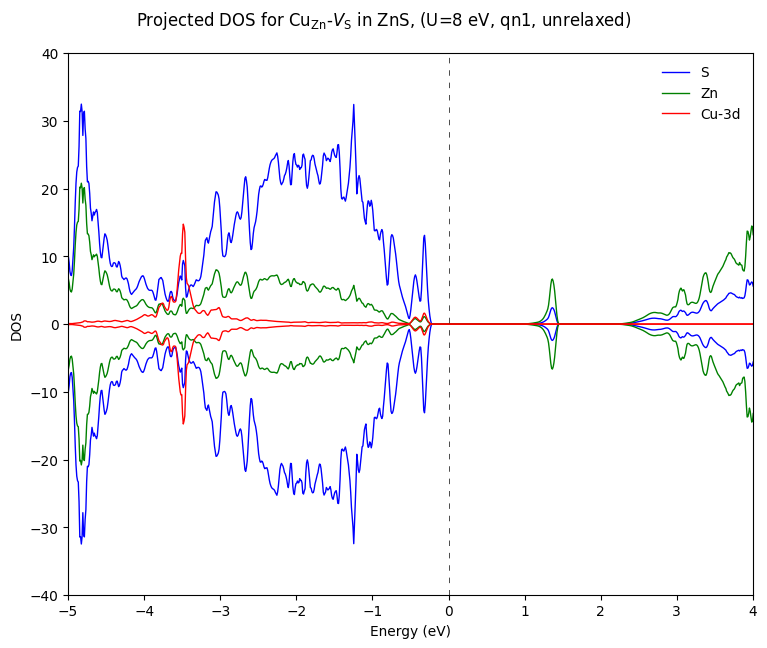

In [6]:
for i in range(2,9):
    plot_pdos("qn1", str(i))

# Moving average code

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
ws = 2
def data_loader_case(case, qval, Uval):
    title = "unrelaxed"
    data = np.loadtxt(f'{Uval}/6.pdos_files/Cu_vac_in_ZnS.{qval}.unrlxd.U{Uval}.pdos_atm#57(Cu)_wfc#4(d)')

    #energy =  data[:,0]
    energy =  data[int(ws/2)-1:int(-1*ws/2),0]

    pdos_up = []
    pdos_dw = []
    if case == 't2g':
        arr_up = data[:,5] +  data[:,7] +  data[:,11]
        arr_dw = data[:,6] +  data[:,8] + data[:,12] 
    elif case == 'eg':
        arr_up = data[:,3] +  data[:,9]
        arr_dw = data[:,4] +  data[:,10] 
    
    i = 0
    while i < len(arr_up)-ws + 1:
        window = arr_up[i : i + ws]
        avg = sum(window)/ws
        pdos_up.append(avg)
        i += 1
    i = 0
    while i < len(arr_dw)-ws + 1:
        window = arr_dw[i : i + ws]
        avg = sum(window)/ws
        pdos_dw.append(-1*avg)
        i += 1

    return energy, pdos_up, pdos_dw

def plot_pdos_case(qval, Uval):
    title = "unrelaxed"
    energy, pdos_Cu_3d_t2g_up, pdos_Cu_3d_t2g_dw = data_loader_case('t2g', qval, Uval)
    _, pdos_Cu_3d_eg_up, pdos_Cu_3d_eg_dw = data_loader_case('eg', qval, Uval)

    fermi = 5.5452
    my_dpi=99
    fig, axs = plt.subplots(2, 1, figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)

    # Top row with three subplots
    axs[0].plot(energy - fermi, pdos_Cu_3d_t2g_up, linewidth=1, color='r', label=r'$t_{2g}$')
    axs[0].plot(energy - fermi, pdos_Cu_3d_t2g_dw, linewidth=1, color='r')
    axs[0].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[0].legend(frameon=False, fontsize=15)
    axs[0].set_xticks(np.arange(-12,6,1))
    axs[0].set_xlim(-5, 2)
    axs[0].set_ylim(-15, 15)

    axs[1].plot(energy - fermi, pdos_Cu_3d_eg_up, linewidth=1, color='b', label=r'$e_{g}$')
    axs[1].plot(energy - fermi, pdos_Cu_3d_eg_dw, linewidth=1, color='b')
    axs[1].axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    axs[1].legend(frameon=False, fontsize=15)
    axs[1].set_xticks(np.arange(-12,6,1))
    axs[1].set_xlim(-5, 2)
    axs[1].set_ylim(-15, 15)


    # adjust subplot layout
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    # set the overall title
    plt.suptitle(r"Projected DOS for $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$ in ZnS, " + f"(U={Uval} eV, {qval}, {title})", fontsize=15)
    plt.tight_layout()
    plt.ylabel('DOS', fontsize=15)
    plt.xlabel('Energy (eV)', fontsize=15)
    # show the plot
    plt.show()